In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
result = pd.concat([pd.read_csv('accuracy_1.csv'), pd.read_csv('accuracy_2.csv')], axis = 0)
result

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics),0.909091
1,Serum(Specific Metabolics),0.734848
0,Plasma(Raw),0.871212
1,Serum(Raw),0.909091
2,pca2_plasma(Exploratory),0.787879
3,pca2_serum(Exploratory),0.696970
4,pca3_plasma(Exploratory),0.825758
5,pca3_serum(Exploratory),0.696970
6,pca4_plasma(Exploratory),0.825758
7,pca4_serum(Exploratory),0.833333


In [3]:
result.to_csv('accuracy_final.csv', index=False)

In [4]:
result = result.append({'Processed Dataset': 'Plasma(Previous Best)', 'Accuracy': 0.8750}, ignore_index=True)
result = result.append({'Processed Dataset': 'Serum(Previous Best)', 'Accuracy': 0.8333}, ignore_index=True)
result

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics),0.909091
1,Serum(Specific Metabolics),0.734848
2,Plasma(Raw),0.871212
3,Serum(Raw),0.909091
4,pca2_plasma(Exploratory),0.787879
5,pca2_serum(Exploratory),0.696970
6,pca3_plasma(Exploratory),0.825758
7,pca3_serum(Exploratory),0.696970
8,pca4_plasma(Exploratory),0.825758
9,pca4_serum(Exploratory),0.833333


In [36]:
plasma_best = [['Previous Best', 87.5000], ['Approach 1', 89.0802],\
              ['Approach 2', 87.8560], ['Combined Approach', 89.0802]]
plasma = pd.DataFrame(plasma_best, columns = ['Approaches', 'Accuracy'])
plasma

,Approaches,Accuracy
0,Previous Best,87.5000
1,Approach 1,89.0802
2,Approach 2,87.8560
3,Combined Approach,89.0802


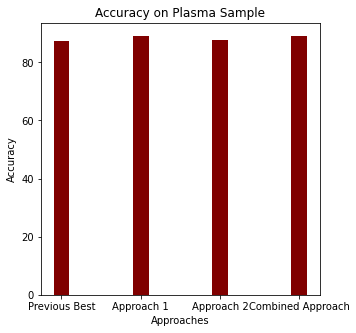

In [41]:
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(plasma.Approaches, plasma.Accuracy, color ='maroon',width = 0.2)

plt.xlabel("Approaches")
plt.ylabel("Accuracy")
plt.title("Accuracy on Plasma Sample")
plt.show()


In [14]:
both = [['Plasma', 87.50, 90.91, 87.12, 90.91, 82.58, 90.91, 65.15],\
        ['Serum', 83.33, 73.48, 90.91, 91.67, 74.24, 74.24, 69.70]]
both_df = pd.DataFrame(both, columns = ['Samples', 'Previous Best', 'Approach 1', 'Approach 2(Only Pearson)',\
                                        'Approach 2(PCA-5)', 'Approach 2(PCA-10)', 'Approach 2(PCA-15)',
                                       'Approach 2(tSNE)'])
both_df

,Samples,Previous Best,Approach 1,Approach 2(Only Pearson),Approach 2(PCA-5),Approach 2(PCA-10),Approach 2(PCA-15),Approach 2(tSNE)
0,Plasma,87.50,90.91,87.12,90.91,82.58,90.91,65.15
1,Serum,83.33,73.48,90.91,91.67,74.24,74.24,69.70


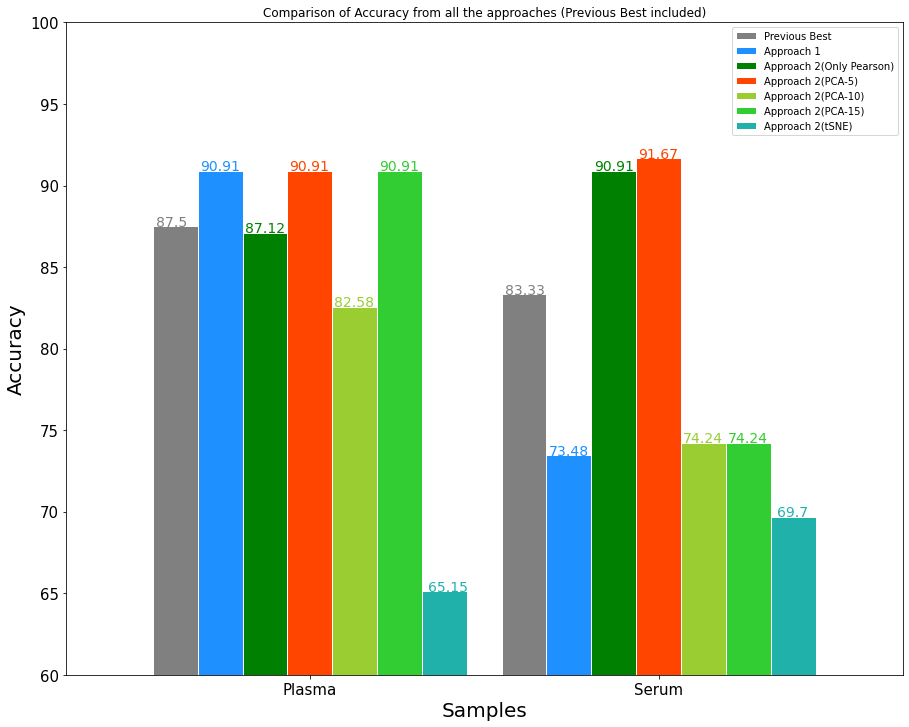

In [62]:
both_df.plot(x='Samples', y=['Previous Best', 'Approach 1', 'Approach 2(Only Pearson)', 'Approach 2(PCA-5)', \
                             'Approach 2(PCA-10)', 'Approach 2(PCA-15)', 'Approach 2(tSNE)'], kind="bar", \
             figsize=(15,12), width=0.9, color=['gray','dodgerblue', 'green', 'orangered', 'yellowgreen', 'limegreen', 'lightseagreen'], edgecolor='white')

plt.title('Comparison of Accuracy from all the approaches (Previous Best included)')
plt.xlabel('Samples', size = 20)
plt.xticks(rotation='horizontal', size = 15)
plt.yticks(size = 15)
plt.ylabel('Accuracy', size = 20)
plt.legend(loc="upper right")
plt.ylim([60, 100])

# location of annotation
for i, rows in both_df.iterrows():
    plt.annotate(rows["Previous Best"], xy=(i-0.44, rows["Previous Best"]), rotation=0, color="gray", size = 14)
    plt.annotate(rows["Approach 1"], xy=(i-0.315, rows["Approach 1"]), rotation=0, color="dodgerblue", size = 14)
    plt.annotate(rows["Approach 2(Only Pearson)"], xy=(i-0.185, rows["Approach 2(Only Pearson)"]), rotation=0, color="green", size = 14)
    plt.annotate(rows["Approach 2(PCA-5)"], xy=(i-0.06, rows["Approach 2(PCA-5)"]), rotation=0, color="orangered", size = 14)
    plt.annotate(rows["Approach 2(PCA-10)"], xy=(i+0.07, rows["Approach 2(PCA-10)"]), rotation=0, color="yellowgreen", size = 14)
    plt.annotate(rows["Approach 2(PCA-15)"], xy=(i+0.20, rows["Approach 2(PCA-15)"]), rotation=0, color="limegreen", size = 14)
    plt.annotate(rows["Approach 2(tSNE)"], xy=(i+0.34, rows['Approach 2(tSNE)']), rotation=0, color="lightseagreen", size = 14)

plt.savefig('result.JPG')
plt.show()